# Car Case Study

## Problem Statement
A Chinese automobile company <b>Geely Auto</b> aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an <b>automobile consulting company</b> to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

 

## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statsmodel 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 500)



In [3]:
filepath = 'C:/data/anitha-ml/Machine Learning/Linear Regression/assignment/'

In [4]:
cars = pd.read_csv(filepath+'CarPrice_Assignment.csv',encoding='ISO-8859-1',low_memory=False)

In [5]:
cars.shape

(205, 26)

In [6]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning and EDA process

In [7]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
## Fetch company name
cars['companyname']= cars['CarName'].apply(lambda x: str(x).split(' ')[0])
# Car name is not required since we are going to do the analysis on company name. hence droppping it
cars = cars.drop('CarName',axis=1)

In [10]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [11]:
cars.companyname.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
maxda           2
vw              2
mercury         1
Nissan          1
porcshce        1
vokswagen       1
toyouta         1
Name: companyname, dtype: int64

In [12]:
# replace the following company names 
#maxda,toyouta,vokswagen,Nissan ,porcshce ,vw
company_names = {'maxda':'mazda',
                 'toyouta':'toyota',
                 'vokswagen':'volkswagen',
                 'vw':'volkswagen',
                 'Nissan':'nissan',
                 'porcshce':'porsche'}
cars.companyname = cars.companyname.replace(company_names)


In [13]:
cars.companyname.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: companyname, dtype: int64

In [14]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

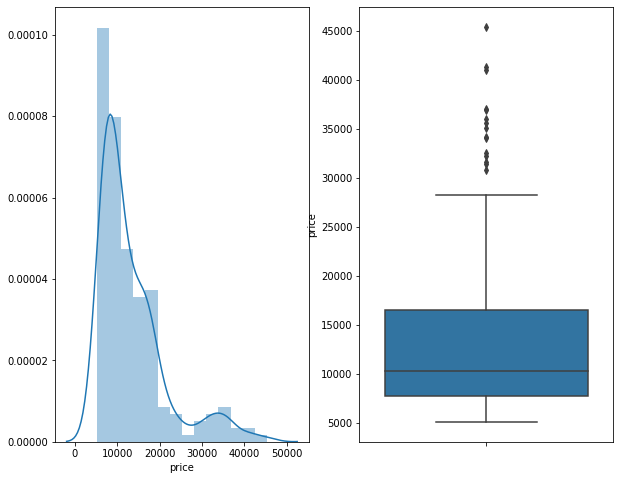

In [15]:
# Analyzing car price
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(cars.price)

plt.subplot(1,2,2)
sns.boxplot(y=cars.price)

## Observation
- Most of the cars price range is between 7,000 to 16,000
- There is significant difference between mean and median.

In [16]:
# Checking categorical variables
categorical_vars = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation'
                    ,'enginetype','cylindernumber','fuelsystem','companyname']
for i in categorical_vars:
    print('Value count of {0}'.format(i))
    print(cars[i].value_counts())
    print('\n')


Value count of fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64


Value count of aspiration
std      168
turbo     37
Name: aspiration, dtype: int64


Value count of doornumber
four    115
two      90
Name: doornumber, dtype: int64


Value count of carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


Value count of drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


Value count of enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64


Value count of enginetype
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


Value count of cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


Value count of fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi

### Some common methods before plotting graphs

In [17]:
def def_subplots(x,axs):
    num = len(x)
    cols=num
    rows=1
    if(axs=='v'):
        rows=num
        cols=1 
    return num,rows,cols

def plot_bars_valcnt(df,x):
    axs = df[x].value_counts().plot.bar(color=sns.color_palette('husl', 16))
    axs.set_xlabel(x+"\n", fontsize=14)
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90)

    
def plot_bars_subplots_valcnt(df, x=[],axs='h'):
    plt.figure(figsize=(15,7))
    num,rows,cols= def_subplots(x,axs)
    for i in range(0,num):
        plt.subplot(rows,cols,i+1)
        plot_bars_valcnt(df,x[i])
        
    plt.show()

In [18]:
 
def plot_bars_subplots(df,y, x=[],axs='h'):
    plt.figure(figsize=(15,7))
    num,rows,cols= def_subplots(x,axs)

    for i in range(0,num):
        plt.subplot(rows,cols,i+1)
        axs = sns.barplot(x=x[i],y=y,data=df)
        axs.set_xlabel(x[i]+"\n", fontsize=14)
        axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
    plt.show()

In [19]:
def plot_bars_avgprice(df,x={},axs='v'):
    plt.figure(figsize=(15,7))
    num,rows,cols= def_subplots(x,axs)
    i=0
    for key, value in x.items():
        plt.subplot(rows,cols,i+1)
        axs=df.groupby(key)['price'].mean().sort_values(ascending=False).plot.bar(color=sns.color_palette('husl', 16))
        axs.set_xlabel(key+"\n", fontsize=14)
        if(i==0):
            axs.set_ylabel("Avg. Price", fontsize=14)
        
        plt.title(value)
        i=i+1
    plt.show()

In [20]:
def plot_val_cnt_price(df,x,title):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    axs = df[x].value_counts().plot.bar(color=sns.color_palette('husl', 16))
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
    axs.set_ylabel("Count of "+x, fontsize=14)

        
    plt.subplot(1,2,2)
    axs1=sns.boxplot(x=x,y='price',data=df)
    axs1.set_ylabel("Price of "+x, fontsize=14)
    
    plt.subplots_adjust(top = 1.0)
    plt.suptitle(title,y=1.05)
    plt.tight_layout()

    plt.show()

In [21]:
def plot_scatter(df , x , title):
    rows=1
    cols= len(x)
    plt.figure(figsize=(10,5))
    for i in range(0,cols):
        plt.subplot(rows,cols,i+1)
        axs= sns.scatterplot(x=cars[x[i]],y=df['price'])
        axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
        plt.subplots_adjust(hspace = 1.0)
        plt.title(x[i]+' vs Price')
        plt.ylabel('Price')
        plt.xlabel(x[i])

    plt.tight_layout()
    plt.show()
   

#### Analyzing more on the categorical variables
- Companyname
- Fueltype
- Carbody
- Aspiration 
- Doornumber 
- Fuelsystem
- Drivewheel 
- Enginelocation
- Enginetype 
- Cylindernumber 
- Symboling

##### Analyzing First 3 categories
- Companyname
- Fueltype
- Carbody

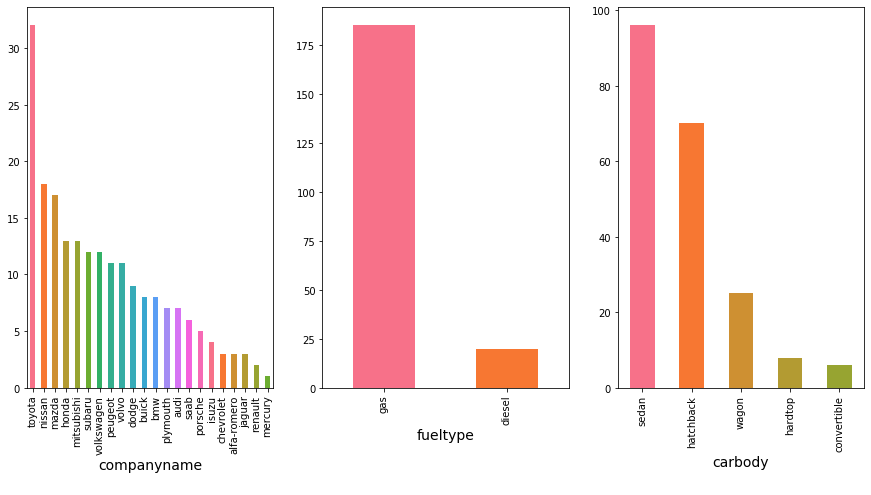

In [22]:
plot_bars_subplots_valcnt(cars,['companyname','fueltype','carbody'],axs='h')

## Observation
- Toyota seems to be a preferred car compared to other cars in market
- Cars running with Gas seems to be more preferred compared to diesel
- Sedan Car body is performing well compared to other car bodies

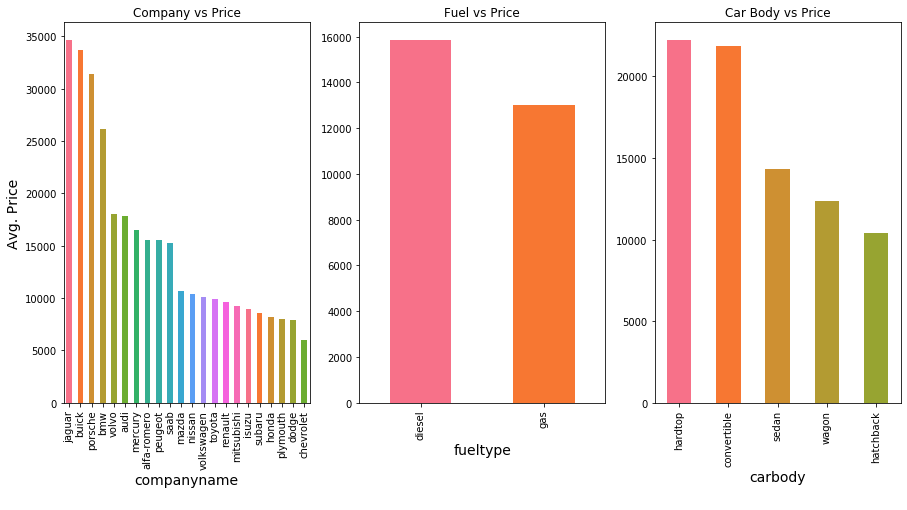

In [23]:
# Plot the graphs with average price for company fuel and carbody

vars_={'companyname':'Company vs Price','fueltype':'Fuel vs Price','carbody':'Car Body vs Price'}

plot_bars_avgprice(cars,vars_,axs='h')

## Observation

- Jaguar,Buick, Porsche   seems to produce high priced cars
- Cars running with Diesel engines seems to higher priced compared to gas
- HardTop and convertibles tops the avg price compared to other car body types

#### Analyzing next 3 Categorical variables
- Aspiration 
- Doornumber 
- Fuelsystem

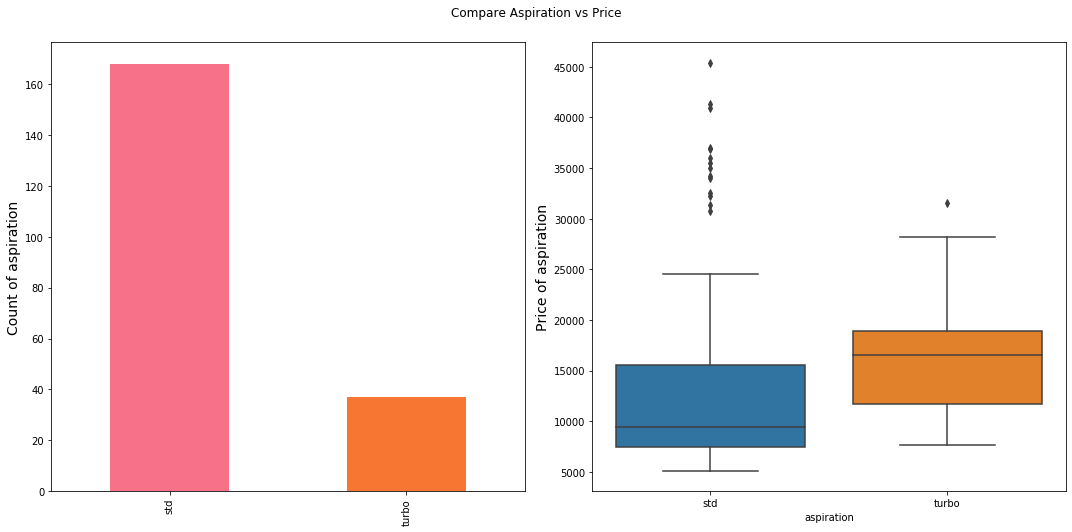

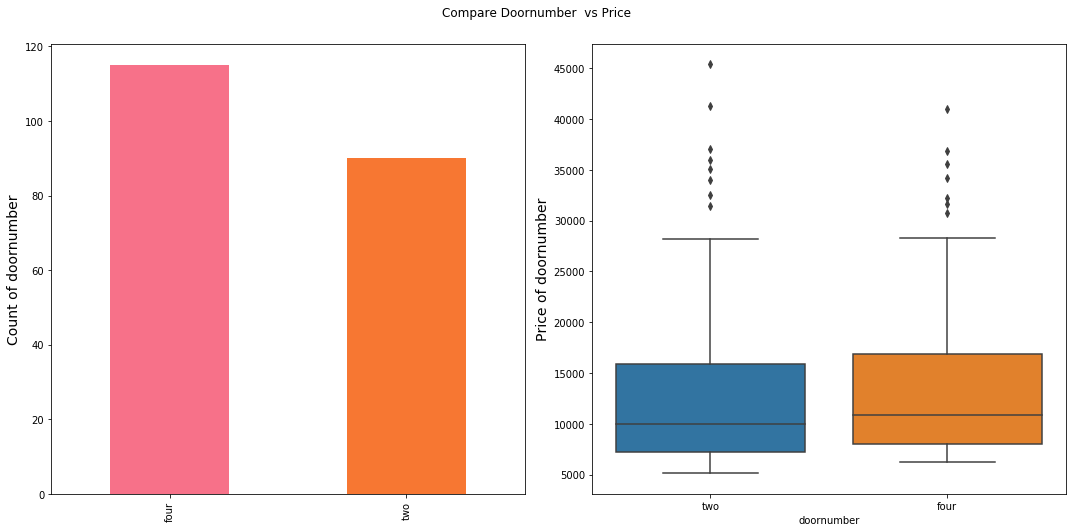

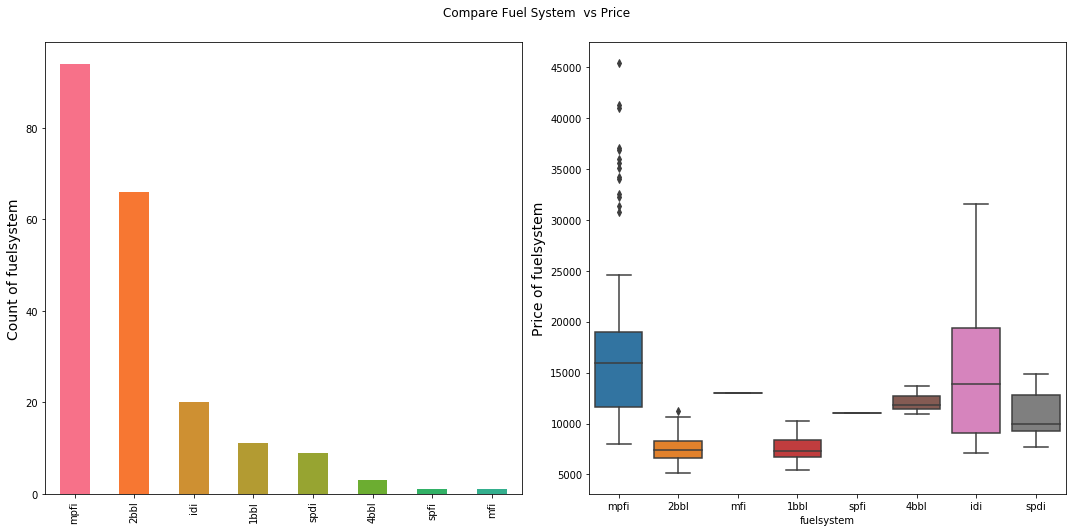

In [24]:
plot_val_cnt_price(cars,'aspiration','Compare Aspiration vs Price')
plot_val_cnt_price(cars,'doornumber','Compare Doornumber  vs Price')
plot_val_cnt_price(cars,'fuelsystem','Compare Fuel System  vs Price')

## Observation
- Std aspiration is used more compared turbo. Probably because turbo is higher priced and mostly used in the high end cars
- Cars with 4 doors are used in general. Not much of a difference could be seen between two doors and 4 doors. Though cars with 4 doors are priced sligtly higher compared to 2 doors
- mpfi and 2bbl are the most commonly used fuel systems. mpfi and idi are priced higher compared to other categories. However other categories seem to have very few records to arrive at a meaningful assumption

#### Analyzing the following 
- Drivewheel 
- Enginelocation
- Enginetype 

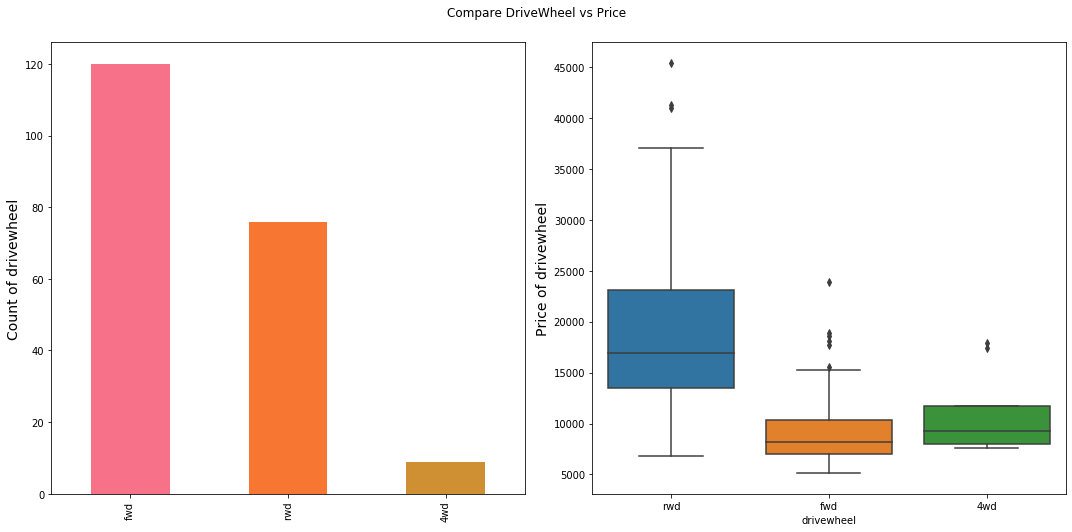

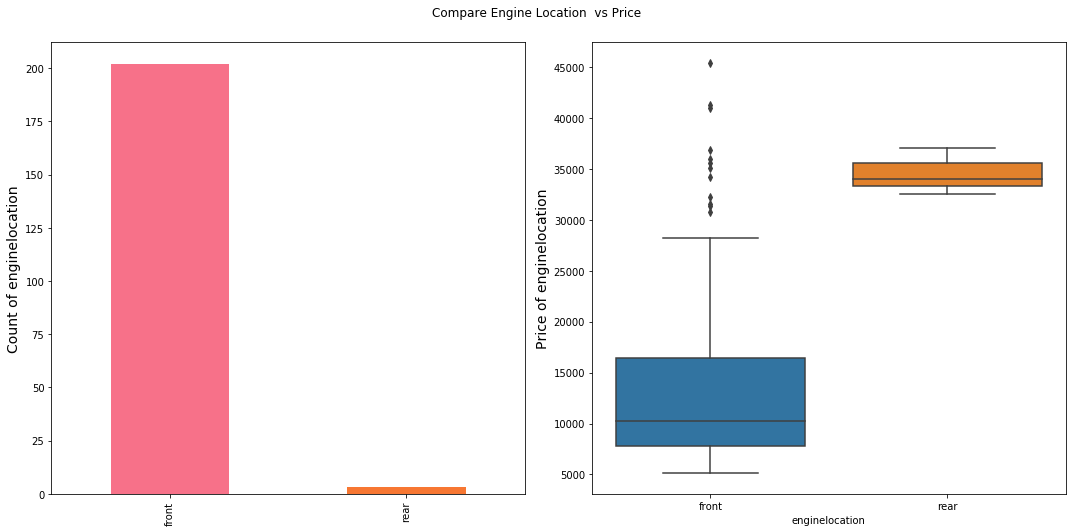

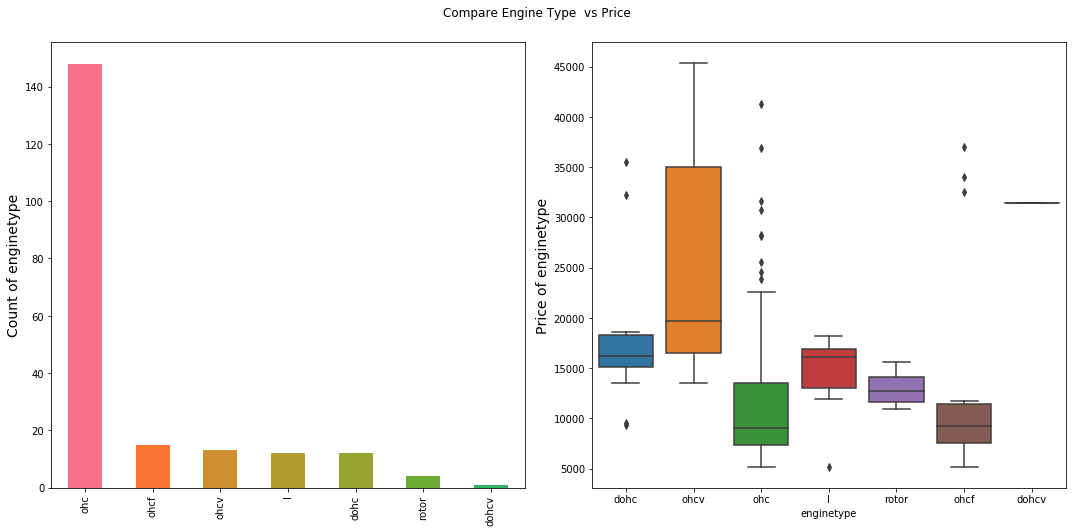

In [25]:
plot_val_cnt_price(cars,'drivewheel','Compare DriveWheel vs Price')
plot_val_cnt_price(cars,'enginelocation','Compare Engine Location  vs Price')
plot_val_cnt_price(cars,'enginetype','Compare Engine Type  vs Price')

## Observation
- Fwd and Rwd are the most popular drive wheel ones. Avg. price od Rwd is on the higher end compared to other categories
- In almost 95% of the cars Engine Location is in the front. Very few cars in the data set have rear engine. The engine in the rear are priced very high.
- ohc Engine types are widely used and they seem to priced higher compared to other categories. However, other engine types data set is negligible. 

#### Analyzing the following 
- Cylindernumber
- Symboling 

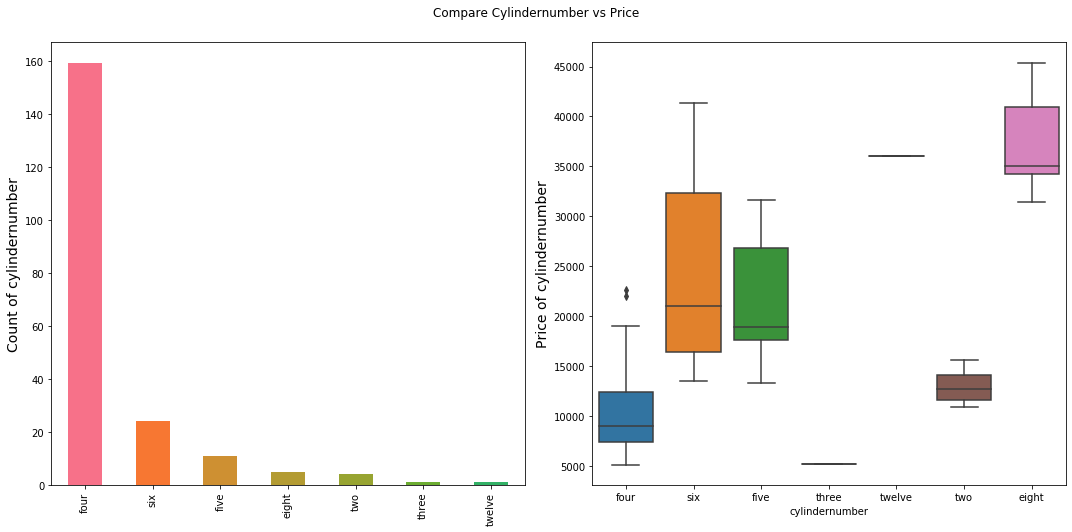

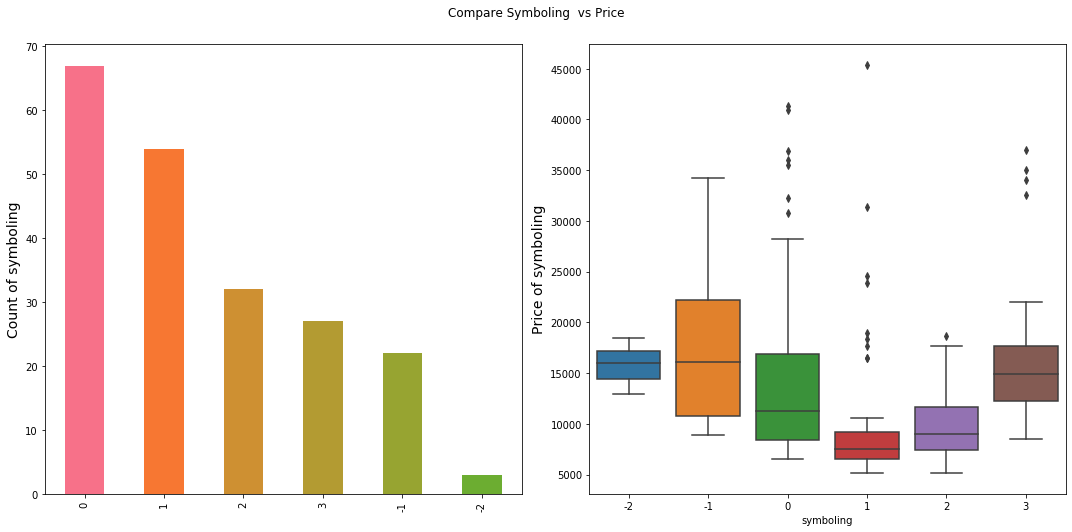

In [26]:
plot_val_cnt_price(cars,'cylindernumber','Compare Cylindernumber vs Price')
plot_val_cnt_price(cars,'symboling','Compare Symboling  vs Price')

## Observation
- 4 cylinder is the most commonly used. 6, 5, 8 cyclinders are priced high. But the data in dataset is  very less and may be difficult to infer. 
- 0,1 Symboling is most common in the data set provided. 
- It is observed that -1 is priced higher. While we see a dip with symboling @ 1 and -2 and 3 again we see price increases since the autombile is termed risky when the symboling is +3

# Analyzing Numeric Variables
- carlength          
- carwidth           
- carheight          
- curbweight           
- boreratio          
- stroke             
- compressionratio   
- horsepower           
- peakrpm              
- citympg              
- highwaympg 
- wheelbase   
- enginesize

#### Analyzing 
- carlength          
- carwidth           
- carheight 
- curbweight

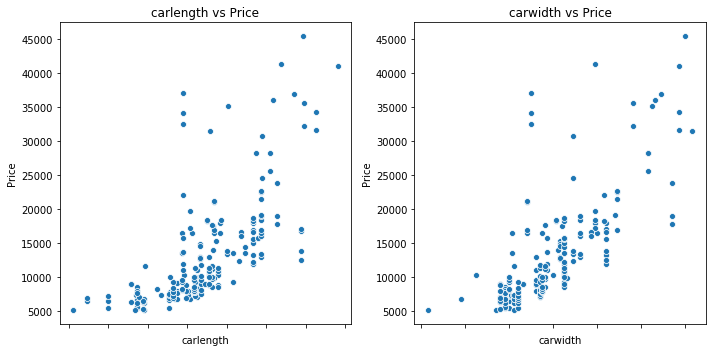

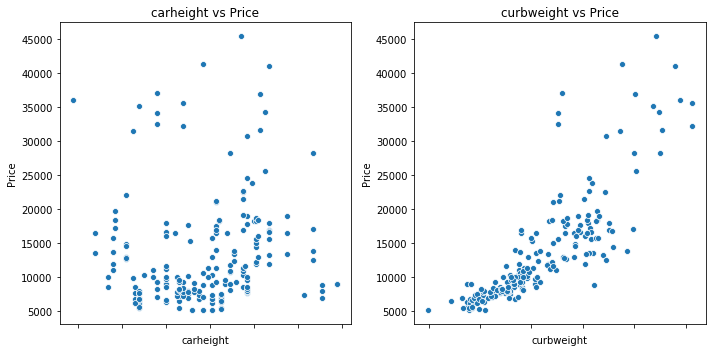

In [27]:

plot_scatter(cars,['carlength','carwidth'],' vs Price')
plot_scatter(cars,['carheight','curbweight'],' vs Price')

## Observation
- Car length , Car width  and Curb Weight has some position correlation with price.
- Car height doesnt have any coorelation with the price

#### Analyzing
- boreratio          
- stroke             
- compressionratio   
- horsepower 

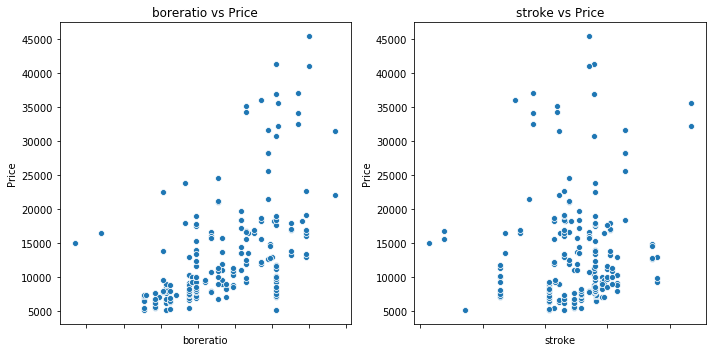

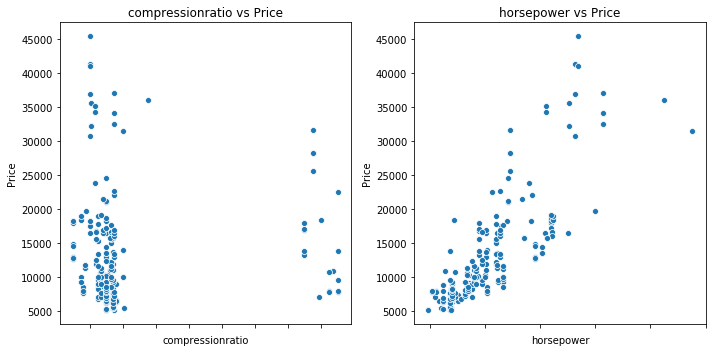

In [28]:
plot_scatter(cars,['boreratio','stroke'],' vs Price')
plot_scatter(cars,['compressionratio','horsepower'],' vs Price')

## Observation
- Boreratio and horsepower has position correlation with the price
- Stroke and Compression ratio does not have any coorelation with the price

#### Analyzing
- peakrpm              
- citympg              
- highwaympg 
- wheelbase   
- enginesize

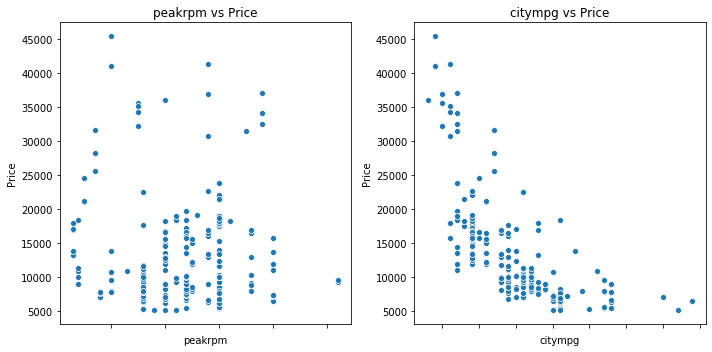

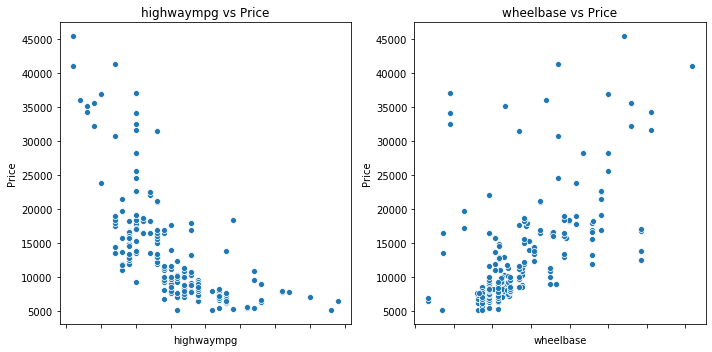

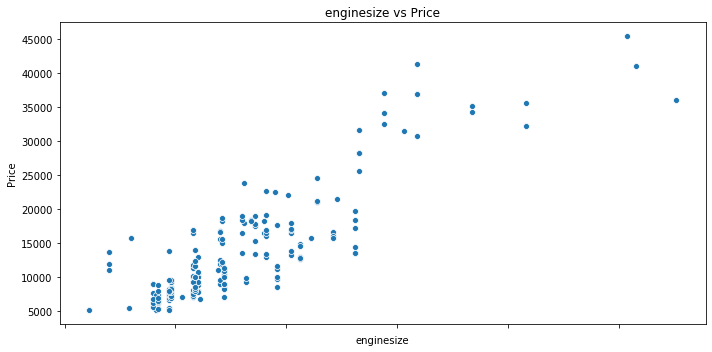

In [29]:
plot_scatter(cars,['peakrpm','citympg'],' vs Price')
plot_scatter(cars,['highwaympg','wheelbase'],' vs Price')
plot_scatter(cars,['enginesize'],' vs Price')

## Observation 
- enginesize, wheelbase seem to have positive correlation
- highwaympg and citympg are having significant negative correlation


## Deriving new variables for further analysis

In [30]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [31]:
# create a temp df for finding car range
cars['price'] = cars['price'].astype('int')
df =cars
mean_price = df.groupby(['companyname'])['price'].mean()
df = df.merge(mean_price.reset_index(), how='left',on='companyname')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Luxury']
cars['cars_range'] = pd.cut(df['price_y'],bins,right=False,labels=cars_bin)
cars.head()



,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,cars_range
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi,Medium


In [32]:
cars.cars_range.value_counts()

Budget    95
Medium    86
Luxury    24
Name: cars_range, dtype: int64

# Considering the following variables based on our visual analysis
- carlength
- carwidth
- curbweight
- highwaympg
- citympg
- cars_range
- horsepower
- boreratio
- wheelbase
- enginetype
- enginesize
- fueltype
- carbody
- aspiration
- drivewheel
- symboling
- cylindernumber

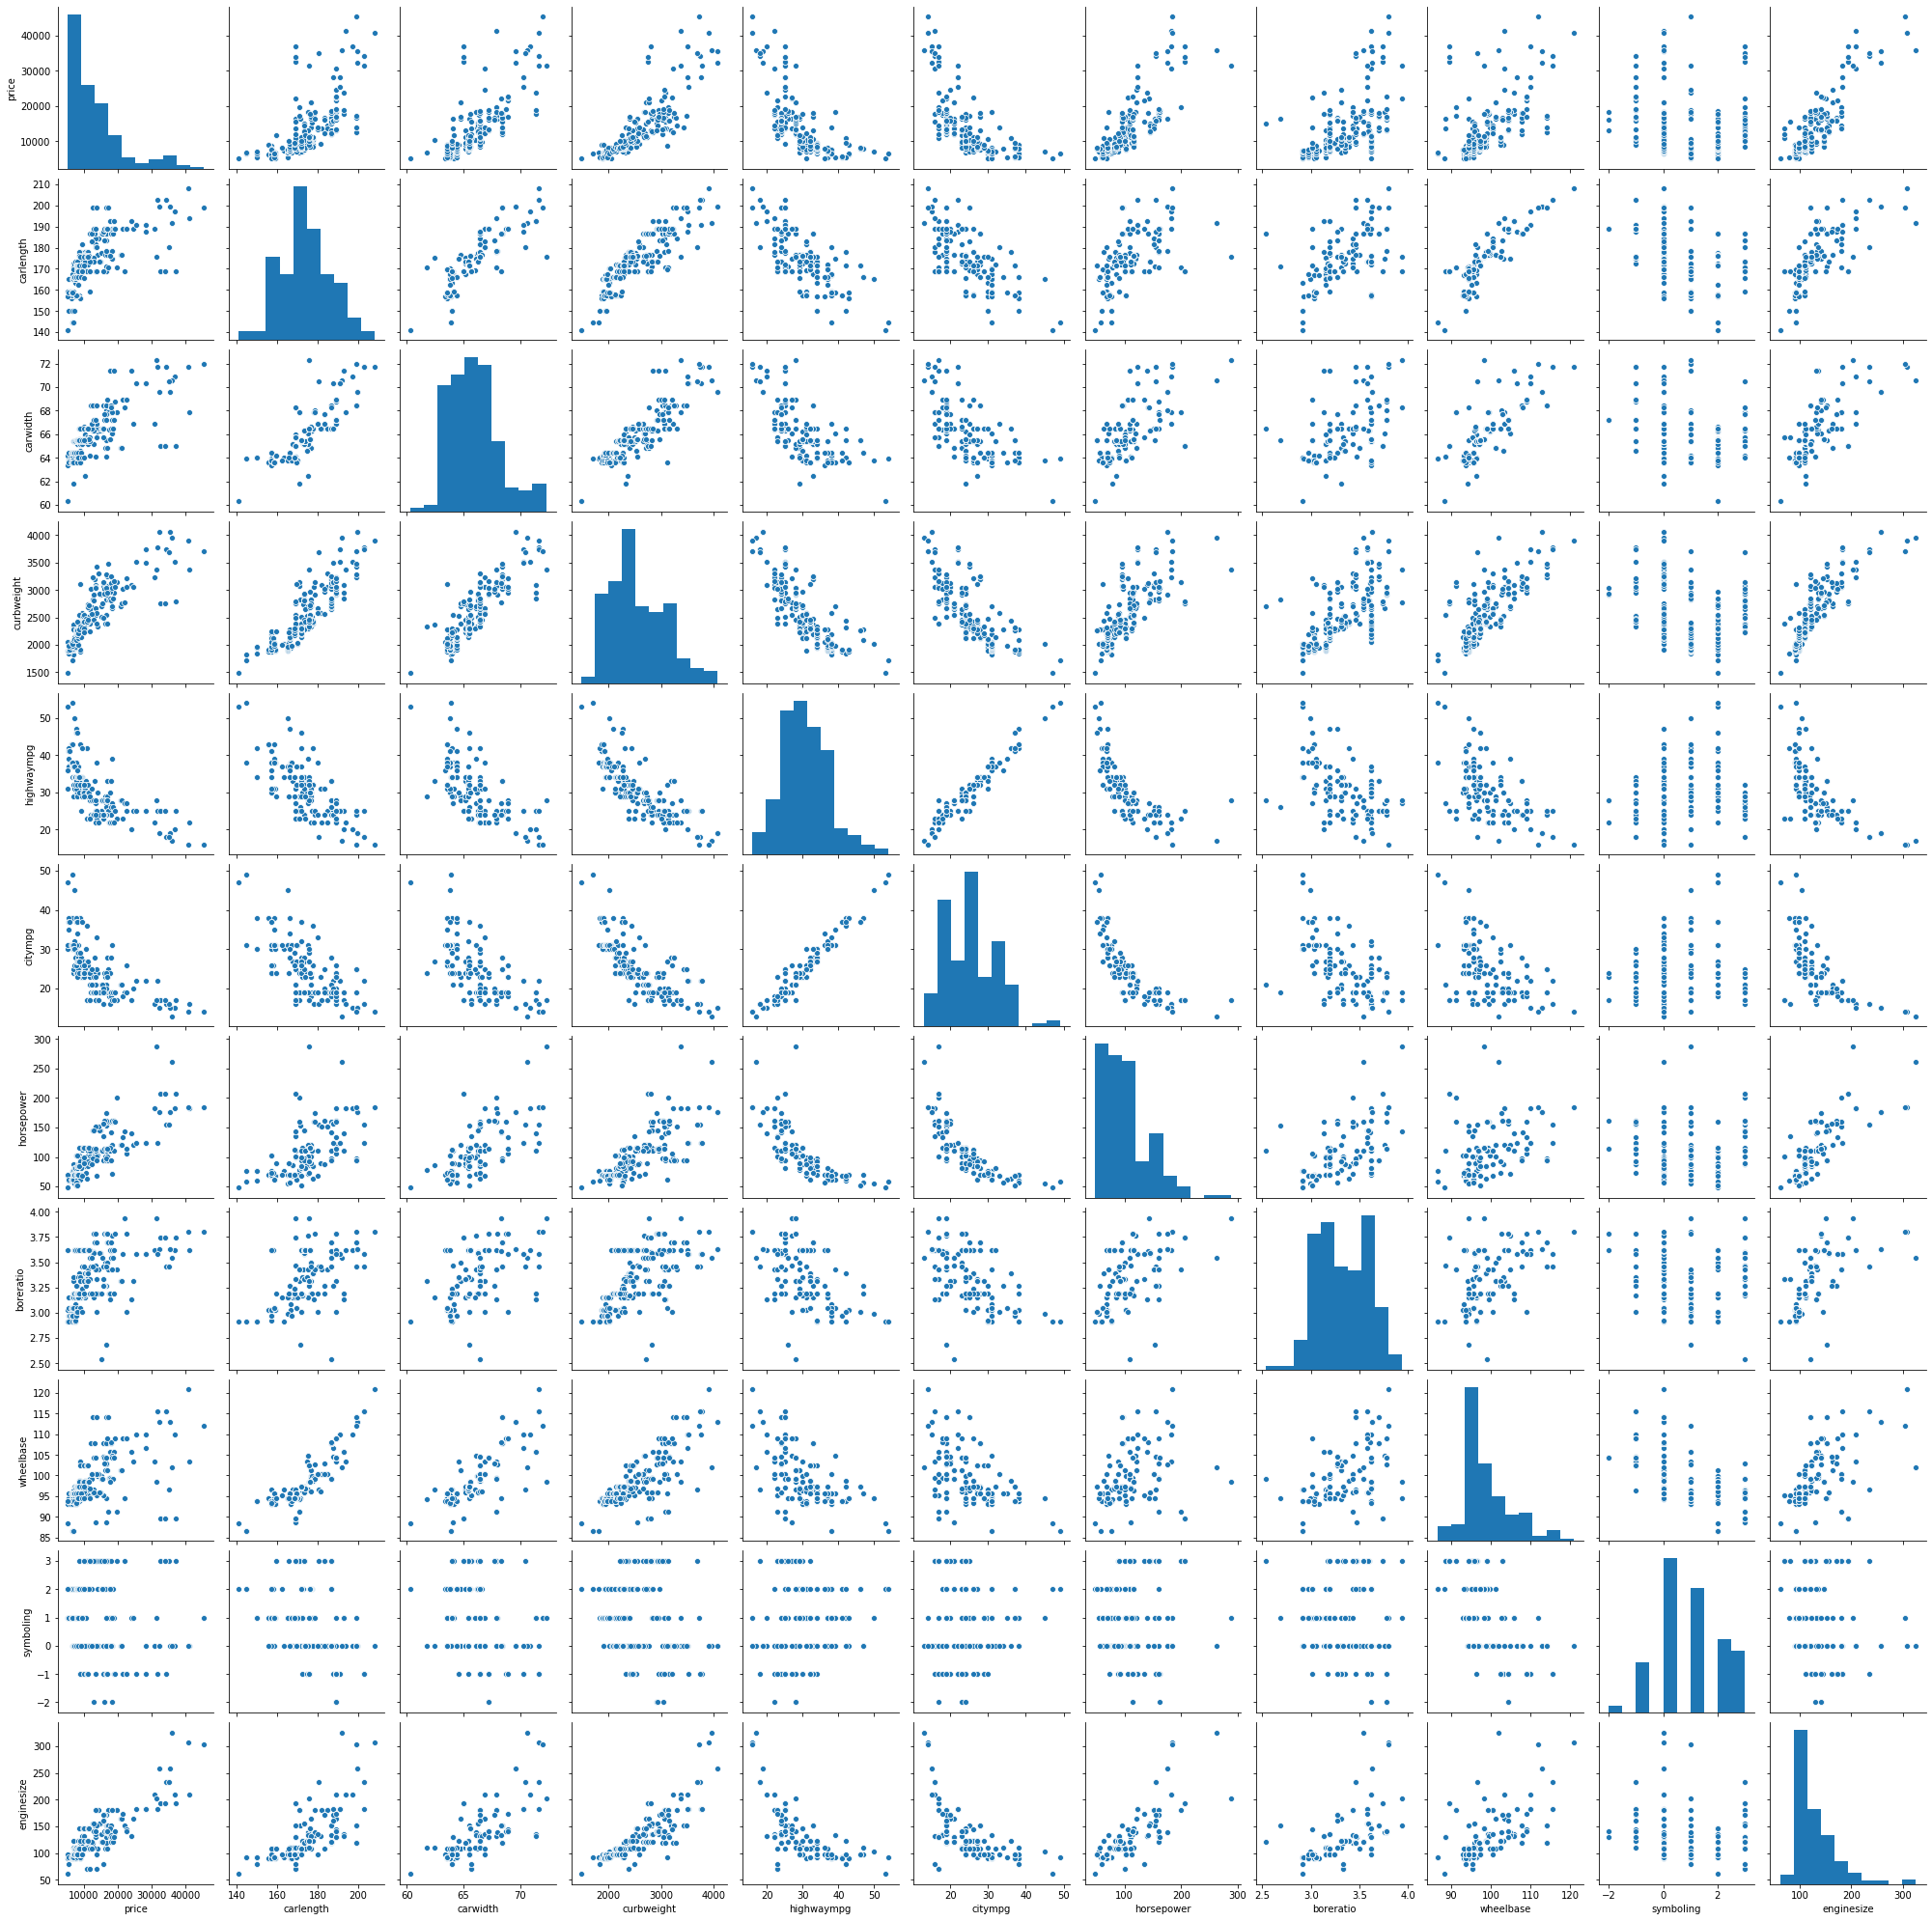

In [33]:
variables_analysis = ['price','carlength','carwidth','curbweight',
                      'highwaympg','citympg','cars_range','horsepower',
                      'boreratio','wheelbase','enginetype',
                      'fueltype','carbody','aspiration','drivewheel',
                      'symboling','cylindernumber','enginesize']

# plotting pair plot for the variables ident
sns.pairplot(cars[variables_analysis])

#### Observation
- Symobling doesnt seem have any linear correlation with the price. So removing it from the analysis 

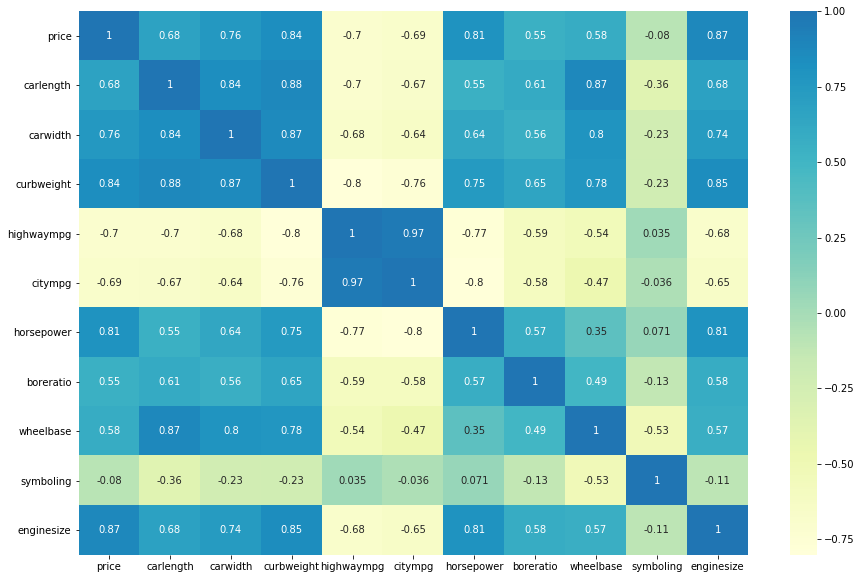

In [34]:
plt.figure(figsize=(15,10))
corr = cars[variables_analysis].corr()
sns.heatmap(corr, annot=True, center=0.5,cmap='YlGnBu')
plt.show()

## Observation
- Highway mpg and city mpg are highly correlated. Since citympg is very unstable factor due to brakings within the city, highwaympg is taken into account
- Engine size, curbweight and carwidth and horepower seems to be highly correlated

In [35]:
variables_analysis = ['price','fueltype','aspiration','carbody',
                      'drivewheel','wheelbase','curbweight',
                      'enginetype','cylindernumber','enginesize',
                      'boreratio','horsepower','highwaympg',
                      'carlength','carwidth','cars_range'
                      ]

In [36]:
def createDummyVariables(v,df):
    temp = pd.get_dummies(df[v], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df= df.drop([v], axis = 1)
    return df

# Create Dummy variables for categorical variables
categorical_vars = ['fueltype','aspiration','carbody','drivewheel',
                    'enginetype','cylindernumber','cars_range']

cars_df = cars[variables_analysis]
cars_df.head()



,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,highwaympg,carlength,carwidth,cars_range
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,27,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,27,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,26,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,30,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,22,176.6,66.4,Medium


In [37]:
for v in categorical_vars:
      cars_df =createDummyVariables(v,cars_df)

In [38]:
cars_df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
0,13495,88.6,2548,130,3.47,111,27,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,27,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,26,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,30,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,22,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


# Splitting the Data into Training and Testing Sets


In [39]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
122,7609,93.7,2191,98,2.97,68,38,167.3,63.8,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,22018,94.5,2778,151,3.94,143,27,168.9,68.3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,9538,94.5,2300,98,3.24,112,29,168.7,64.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,27,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,18950,104.3,3157,130,3.62,162,22,188.8,67.2,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


# Rescaling the Features

   - We will use MinMax scaling.



In [41]:
# Defining scaler
scaler = MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','highwaympg','carlength','carwidth','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.567568,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.270270,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.324324,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.270270,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.135135,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


# Dividing into Independent and Dependent sets for the model building
    - All the variables have been converted into numeric values

In [43]:
y_train = df_train.pop('price')
X_train = df_train

# Using RFE (Recursive Feature Elimination) for feature elimination

In [44]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,highwaympg,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxury
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.567568,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.270270,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.324324,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.270270,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.135135,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [45]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
rfe= RFE(lm,10)
rfe= rfe.fit(X_train,y_train)

In [47]:
len(X_train.columns)

30

In [48]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('highwaympg', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 16),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 19),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Luxury', True, 1)]

In [49]:
cols = X_train.columns[rfe.support_]
cols

Index(['curbweight', 'horsepower', 'highwaympg', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Luxury'],
      dtype='object')

In [50]:
X_train_rfe= X_train[cols]

In [51]:
X_train_rfe.head()

,curbweight,horsepower,highwaympg,carwidth,hatchback,sedan,wagon,dohcv,twelve,Luxury
122,0.272692,0.083333,0.567568,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.270270,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.324324,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.270270,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.135135,0.575000,0,0,1,0,0,0


In [52]:
def stats_model(X_train,y_train):
    X_train_sm = sm.add_constant(X_train) #Adding the constant
    lm = sm.OLS(y_train,X_train).fit() # fitting the model
    print(lm.summary()) # model summary
    return X_train_sm

def vfi_stats(X):
    vif= pd.DataFrame()
    vif['Features']= X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(0,X.shape[1])]
    vif['VIF'] =round(vif['VIF'],2)
    vif= vif.sort_values(by='VIF',ascending=False)
    print(vif)

### Build Model with obtained rfe

In [53]:
X_train_new = stats_model(X_train_rfe,y_train)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              353.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):                    1.21e-90
Time:                        07:09:01   Log-Likelihood:                          203.17
No. Observations:                 143   AIC:                                     -386.3
Df Residuals:                     133   BIC:                                     -356.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
vfi_stats(X_train_new)

      Features    VIF
0        const  74.84
1   curbweight   8.47
6        sedan   6.18
5    hatchback   5.68
2   horsepower   5.64
4     carwidth   5.21
3   highwaympg   3.78
7        wagon   3.62
8        dohcv   1.79
10      Luxury   1.68
9       twelve   1.25


## Observation
   - <mark> Highway mpg seems to have high pvalue of 0.950. Removing and rebuilding the model</mark>

In [55]:
X_train_new = X_train_rfe.drop(["highwaympg"], axis = 1)
X_train_new.head()

,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,twelve,Luxury
122,0.272692,0.083333,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.575000,0,0,1,0,0,0


### Building Another model - Model 2

In [56]:
X_train_new = stats_model(X_train_new,y_train)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              396.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):                    5.93e-92
Time:                        07:09:02   Log-Likelihood:                          203.17
No. Observations:                 143   AIC:                                     -388.3
Df Residuals:                     134   BIC:                                     -361.7
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
vfi_stats(X_train_new)

     Features    VIF
0       const  27.34
1  curbweight   8.21
5       sedan   6.15
4   hatchback   5.65
3    carwidth   5.14
2  horsepower   4.04
6       wagon   3.61
9      Luxury   1.65
7       dohcv   1.52
8      twelve   1.21


## Observation

   - <mark>Twelve seems to have high pvalue of 0.216. Removing and rebuilding the model after removing it</mark>

In [58]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)

In [59]:
X_train_new.head()

,const,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,Luxury
122,1.0,0.272692,0.083333,0.291667,0,1,0,0,0
125,1.0,0.500388,0.395833,0.666667,1,0,0,0,1
166,1.0,0.314973,0.266667,0.308333,1,0,0,0,0
1,1.0,0.411171,0.262500,0.316667,0,0,0,0,0
199,1.0,0.647401,0.475000,0.575000,0,0,1,0,0


### Building Another model - Model 3

In [60]:
X_train_new = stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.85e-72
Time:                        07:09:04   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [61]:
vfi_stats(X_train_new)

     Features    VIF
0       const  26.90
1  curbweight   8.10
5       sedan   6.07
4   hatchback   5.63
3    carwidth   5.14
2  horsepower   3.61
6       wagon   3.58
8      Luxury   1.63
7       dohcv   1.46


## Observation

   - <mark>All the p vales are well within the range</mark>
   - <mark> The VIF of curbweight is way above the range. 8.10. Hence dropping it </mark>

In [62]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### Building Another model - Model 4

In [63]:
X_train_new = stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.70e-70
Time:                        07:09:07   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [64]:
vfi_stats(X_train_new)

     Features    VIF
0       const  26.89
4       sedan   6.06
3   hatchback   5.54
5       wagon   3.47
1  horsepower   2.50
2    carwidth   2.22
7      Luxury   1.56
6       dohcv   1.21


## Observation

   - <mark>sedan seems to have high vif value >5 (6.06). Removing and rebuilding the model after removing it</mark>

In [65]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Building Another model - Model 5

In [66]:
X_train_new = stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.68e-69
Time:                        07:09:08   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [67]:
vfi_stats(X_train_new)

     Features    VIF
0       const  10.82
1  horsepower   2.39
2    carwidth   2.09
6      Luxury   1.55
3   hatchback   1.23
5       dohcv   1.21
4       wagon   1.11


## Observation
- p value of wagon is now 0.315. Hence dropping it

In [68]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### Building Another model - Model 6

In [69]:
X_train_new = stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.57e-70
Time:                        07:09:09   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [70]:
vfi_stats(X_train_new)

     Features    VIF
0       const  10.39
1  horsepower   2.39
2    carwidth   2.08
5      Luxury   1.53
4       dohcv   1.21
3   hatchback   1.13


## Observation
 - Now Both VIF and P value is within the limit
 - The R-Squared is 0.912 which is good
 - The Adjusted R-Squared is 0.909 .
 - F statistics is 1.57e-70 which suggests that the overall model fit is significant

 # Residual Analysis

In [71]:
lm_model = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm_model.predict(X_train_new)

Text(0, 0.5, 'y_train_pred')

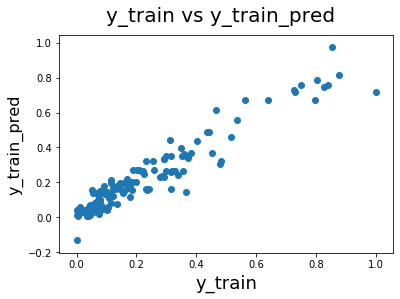

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)    

## Observation
- y_train and y_train_pred seem to have good linerarity. 

Text(0.5, 0, 'Errors')

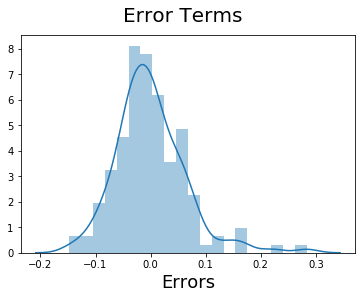

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observation
- The Errors are normally distributed

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sizth model.

#### Applying the scaling on the test sets

In [74]:
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [75]:
y_test = df_test.pop('price')
X_test = df_test

In [76]:
X_train_new.columns


Index(['const', 'horsepower', 'carwidth', 'hatchback', 'dohcv', 'Luxury'], dtype='object')

#### Dropping const column and considering the other columns of train  set which were used for  building the model
- horsepower
- carwidth
- hatchback
- dohcv
- Luxury

In [77]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

In [78]:
X_test_new= sm.add_constant(X_test_new)

In [79]:
X_test_new.head()

,const,horsepower,carwidth,hatchback,dohcv,Luxury
160,1.0,0.091667,0.341667,0,0,0
186,1.0,0.154167,0.433333,0,0,0
59,1.0,0.150000,0.516667,1,0,0
165,1.0,0.266667,0.308333,0,0,0
140,1.0,0.104167,0.291667,1,0,0


In [80]:
y_test_pred= lm_model.predict(X_test_new)

## R2 score of Test and Train data set

In [81]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9122493559527808
0.9094354289897939


Text(0, 0.5, 'y_pred')

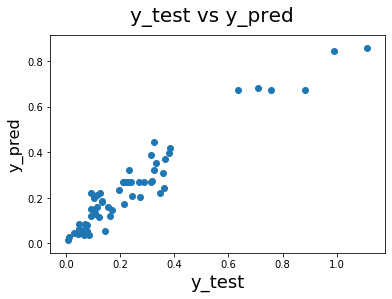

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

## Observation
- We seem to have a pretty goood model with r2 score of train and test data at <b>0.912 and 0.909</b> respectively. 

- Overall we have a decent model

- The price of the car is calculated using the following formula

$ price = 0.501  \times  horsepower + 0.395  \times  carwidth  -0.034 \times hatchback  -0.323 \times dohcv + 0.283 \times Luxury $
